# Posttest 5
# Nama : Muhammad Iqbal Fadiatama
# NIM : 2309106077

In [1]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("Medicaldataset_preprocessed.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Result'])
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", X_train.shape)
print("Jumlah data testing :", X_test.shape)


Jumlah data training: (631, 9)
Jumlah data testing : (158, 9)


1. Buat model Sequential sederhana

In [4]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # hidden layer 1
    Dropout(0.2),                                              # mengurangi overfitting
    Dense(32, activation='relu'),                              # hidden layer 2
    Dense(1, activation='sigmoid')                             # output layer (binary classification)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2. Kompilasi model

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3. Early stopping agar tidak overfitting

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

4. Latih model

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4609 - loss: 0.7169 - val_accuracy: 0.6457 - val_loss: 0.6302
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6967 - loss: 0.6110 - val_accuracy: 0.7165 - val_loss: 0.5724
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7965 - loss: 0.5065 - val_accuracy: 0.7402 - val_loss: 0.5266
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8311 - loss: 0.4678 - val_accuracy: 0.7402 - val_loss: 0.4854
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.4089 - val_accuracy: 0.7717 - val_loss: 0.4481
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.3694 - val_accuracy: 0.7953 - val_loss: 0.4161
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.3211 - val_accuracy: 0.8189 - val_loss: 0.3868
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.2877 - val_accuracy: 0.8425 - val_loss

5. Evaluasi model

In [8]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"\nAkurasi Training: {train_acc*100:.2f}%")
print(f"Akurasi Validation: {val_acc*100:.2f}%")


Akurasi Training: 96.63%
Akurasi Validation: 94.49%


6. Evaluasi pada data test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

=== Evaluasi Model di Data Test ===
Accuracy: 0.9240506329113924

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.95      0.87      0.91        69

    accuracy                           0.92       158
   macro avg       0.93      0.92      0.92       158
weighted avg       0.93      0.92      0.92       158



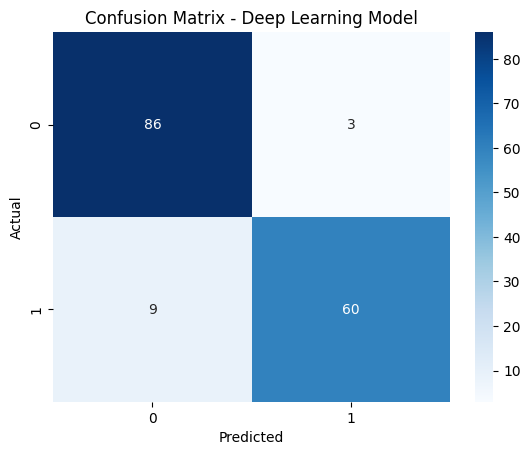

In [9]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n=== Evaluasi Model di Data Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

7. Plot akurasi training vs validation

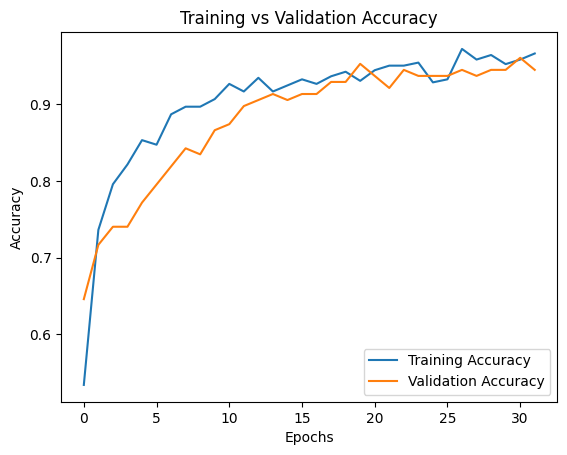

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()